## HW 1 - Algorithms and Applications in Social Networks

Names & IDs:

Yonatan Voikhansky, 315398339

Ariel Ireni, 313914970

In [310]:
from scipy.stats.distributions import nakagami
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np


### Question 1
#### Part A - Erdon Renyi model

In [299]:

def erdos_renyi(n=15, p=0.5):
    G = nx.Graph()

    my_nodes = list(x for x in range(0, n))
    num_of_edges = 0
    
    for n1 in my_nodes:
        G.add_node(n1)
        for n2 in my_nodes:
            if n1 > n2:
                rand = random.uniform(0, 1)
                if rand <= p:
                    G.add_edge(n1, n2)
                    num_of_edges += 1

    return G

#### Part B - clustering coefficient cumputation

In [49]:
def node_clustering_coefficient(G, node):
    k = G.degree(node)
    if k == 0 or k == 1:
        return 0
    neighbors = G[node]
    neighbors_edges = 0
    for n1 in neighbors:
        for n2 in neighbors:
            if n1 != n2 and (n1, n2) in G.edges:
                neighbors_edges += 1
    neighbors_edges = neighbors_edges / 2
    return (2 * neighbors_edges) / (k * (k - 1))

def graph_clustering_coefficient(G):
    n = len(G.nodes)
    sum_coeff = 0
    for node in G.nodes:
        sum_coeff += node_clustering_coefficient(G, node)
    return sum_coeff / n

### Question 2
#### Part A - centrality meatures implementation

In [186]:
def degree_centrality(G):
    n = len(G.nodes)
    return {node: (G.degree(node) / (n - 1)) for node in G.nodes}

def betweenness_centrality(G):
    n = len(G.nodes)
    betweennes_dict = dict()
    for node_i in G.nodes:
        count_i_in_path = 0
        for node_s in G.nodes:
            for node_t in G.nodes:
                all_shortest_paths = list(nx.all_shortest_paths(G, node_s, node_t))
                if node_i not in [node_s, node_t]:
                    sum_in_paths = 0
                    for path in all_shortest_paths:
                        if node_i in path:
                            sum_in_paths += 1
                    count_i_in_path += sum_in_paths / len(all_shortest_paths)

        count_i_in_path = count_i_in_path / 2
        betweennes_dict[node_i] = count_i_in_path * (2 / ((n - 1) * (n - 2)))
    return betweennes_dict

def closeness_centrality(G):
    n = len(G.nodes)
    closeness_dict = dict()
    for n1 in G.nodes:
        curr_sum = 0
        for n2 in G.nodes:
            if n1 != n2:
                curr_sum += nx.shortest_path_length(G, n1, n2)

        closeness_dict[n1] = (n - 1) * (1 / curr_sum)
    return closeness_dict

def verify_results():
    G = erdos_renyi(15, 0.5)
    for node in G.nodes:
        assert(np.allclose(degree_centrality(G)[node], nx.degree_centrality(G)[node]))
        assert(np.allclose(closeness_centrality(G)[node], nx.closeness_centrality(G)[node]))
        assert(np.allclose(betweenness_centrality(G)[node], nx.betweenness_centrality(G)[node]))

verify_results()


#### Part B - top 5 nodes of each measure

In [300]:

def get_top_5_nodes():
    G = erdos_renyi()

    Cd_dict = degree_centrality(G)
    Cd_list = [(k, v) for k, v in Cd_dict.items()]
    Cd_list.sort(key=lambda x: x[1])
    Cd_top_5 = Cd_list[-5:]

    Cb_dict = betweenness_centrality(G)
    Cb_list = [(k, v) for k, v in Cb_dict.items()]
    Cb_list.sort(key=lambda x: x[1])
    Cb_top_5 = Cb_list[-5:]

    Cc_dict = closeness_centrality(G)
    Cc_list = [(k, v) for k, v in Cc_dict.items()]
    Cc_list.sort(key=lambda x: x[1])
    Cc_top_5 = Cc_list[-5:]

    # print results
    print("----- Degree Centrality -----")
    for node, val in Cd_top_5:
        print(f"Node: {node} \tCentrality: {val}")
    
    print("----- Closeness Centrality -----")
    for node, val in Cc_top_5:
        print(f"Node: {node} \tCentrality: {val}")

    print("----- Betweenness Centrality -----")
    for node, val in Cb_top_5:
        print(f"Node: {node} \tCentrality: {val}")    

get_top_5_nodes()

----- Degree Centrality -----
Node: 6 	Centrality: 0.5
Node: 10 	Centrality: 0.5
Node: 11 	Centrality: 0.5714285714285714
Node: 14 	Centrality: 0.6428571428571429
Node: 12 	Centrality: 0.7857142857142857
----- Closeness Centrality -----
Node: 6 	Centrality: 0.6666666666666666
Node: 10 	Centrality: 0.6666666666666666
Node: 11 	Centrality: 0.7000000000000001
Node: 14 	Centrality: 0.7368421052631579
Node: 12 	Centrality: 0.8235294117647058
----- Betweenness Centrality -----
Node: 1 	Centrality: 0.04450549450549451
Node: 6 	Centrality: 0.06182626896912611
Node: 14 	Centrality: 0.07116692830978547
Node: 11 	Centrality: 0.08626373626373629
Node: 12 	Centrality: 0.14871794871794866


#### Part C - visualize the network

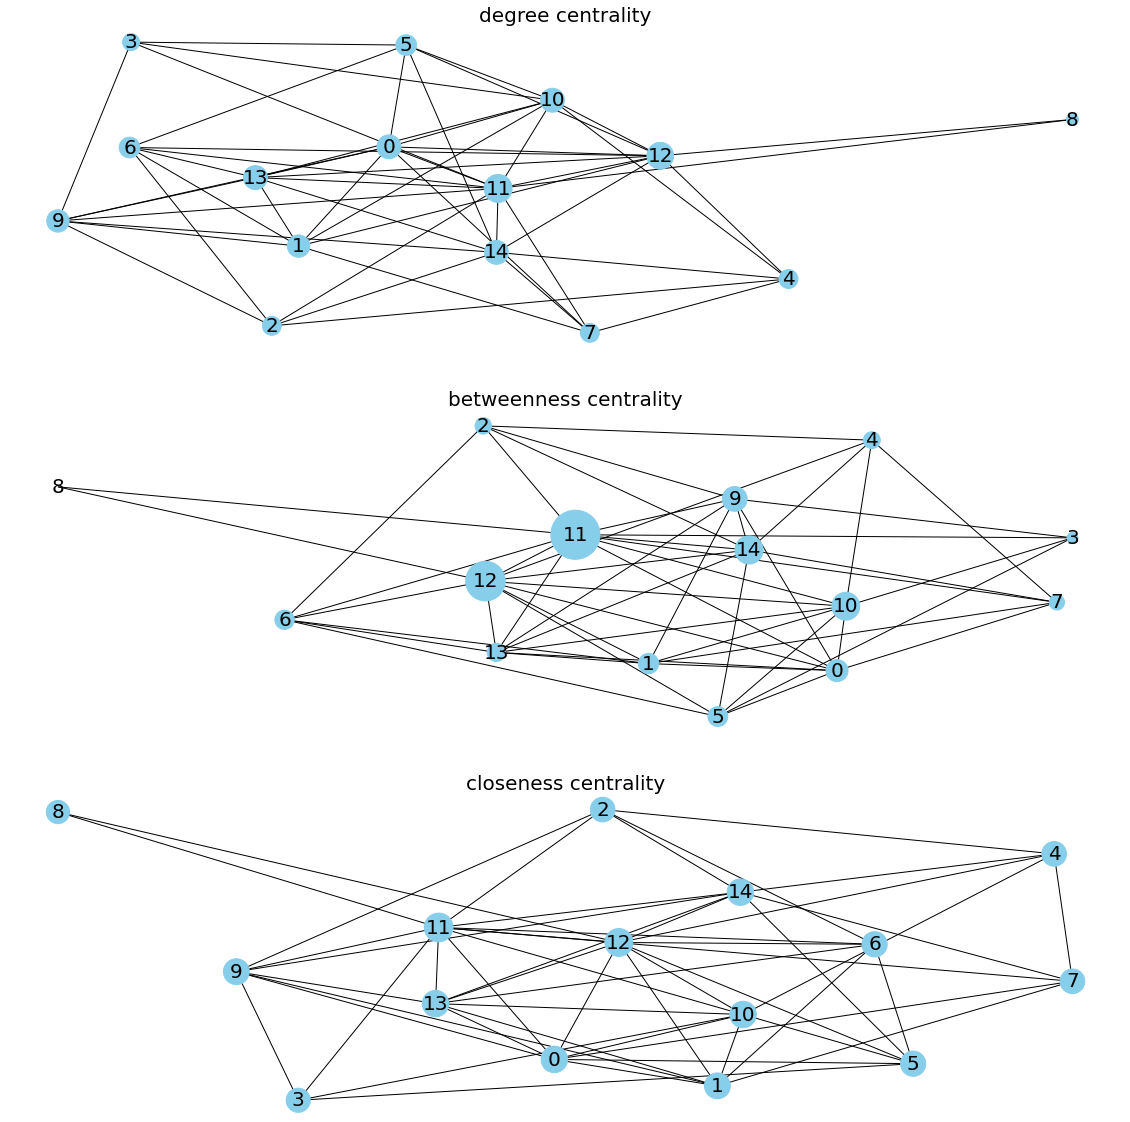

In [311]:
def visualize_network():
    G = erdos_renyi()
    fig, ax = plt.subplots(3, 1, figsize=(20, 20))

    Cd_dict = degree_centrality(G)
    Cd_cetralities = list(Cd_dict.values())
    nx.draw(G, with_labels=True, node_size=[val* 1000 for val in Cd_cetralities], node_color="skyblue", font_size=20, ax=ax[0])
    ax[0].set_title("degree centrality", fontdict={'fontsize': 20})

    Cb_dict = betweenness_centrality(G)
    Cb_cetralities = list(Cb_dict.values())
    nx.draw(G, with_labels=True, node_size=[val * 15000 for val in Cb_cetralities], node_color="skyblue", font_size=20, ax=ax[1])
    ax[1].set_title("betweenness centrality", fontdict={'fontsize': 20})

    Cc_dict = closeness_centrality(G)
    Cc_cetralities = list(Cc_dict.values())
    nx.draw(G, with_labels=True, node_size=[val * 1000 for val in Cc_cetralities], node_color="skyblue", font_size=20, ax=ax[2])
    ax[2].set_title("closeness centrality", fontdict={'fontsize': 20})

    plt.show()

visualize_network()

#### Part D - in the PDF file

### Question 3
#### Part A - check balance

In [119]:
def get_all_triples(G):
    nodes = list(G.nodes)
    triples = []
    for i in range(0, len(nodes)-2):
        for j in range(i+i, len(nodes)-1):
            for k in range(j+1, len(nodes)):
                triples.append((nodes[i], nodes[j], nodes[k]))

    return triples


def get_all_triangles(G):
    edges = list(G.edges)
    triples = get_all_triples(G)
    triangles = []
    for triple in triples:
        if (triple[0], triple[1]) in edges or (triple[1], triple[0]) in edges:
            if(triple[2], triple[1]) in edges or (triple[1], triple[2]) in edges:
                if(triple[0], triple[2]) in edges or (triple[2], triple[0]) in edges:
                    triangles.append(triple)
    return triangles


def check_balance(G):
    triangles = get_all_triangles(G)
    edge_labels = dict([((u, v), d['label']) for u, v, d in G.edges(data=True)])
    for triangle in triangles:
        count_minus = 0
        if (triangle[0], triangle[1]) in edge_labels.keys() and edge_labels[(triangle[0], triangle[1])] == '-':
            count_minus += 1
        if (triangle[1], triangle[0]) in edge_labels.keys() and edge_labels[(triangle[1], triangle[0])] == '-':
            count_minus += 1

        if (triangle[0], triangle[2]) in edge_labels.keys() and edge_labels[(triangle[0], triangle[2])] == '-':
            count_minus += 1
        if (triangle[2], triangle[0]) in edge_labels.keys() and edge_labels[(triangle[2], triangle[0])] == '-':
            count_minus += 1

        if (triangle[2], triangle[1]) in edge_labels.keys() and edge_labels[(triangle[2], triangle[1])] == '-':
            count_minus += 1
        if (triangle[1], triangle[2]) in edge_labels.keys() and edge_labels[(triangle[1], triangle[2])] == '-':
            count_minus += 1

        if count_minus % 2 == 1:
            return False
    return True

#### Part B & C - generate and visualize a random network


In [120]:
def generate_random_network(n, p, p_small, p_large, small, large):
    G = erdos_renyi(n, p)
    for edge in G.edges(data=True):
        rand = random.uniform(0, 1)
        if rand < p_large:
            edge[2]["label"] = large

        elif rand > (1 - p_small):
            edge[2]["label"] = small
    
    pos = dict()
    for node in G.nodes:
        x_pos = random.uniform(0, 20)
        y_pos = random.uniform(0, 20)
        pos[node] = (x_pos, y_pos)

    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] =='+'] # solid edge
    esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == '-'] # dashed edge
    plt.figure(3, figsize=(10, 6))
    nx.draw_networkx_nodes(G,pos,node_size=700, node_color='orange')
    nx.draw_networkx_edges(G,pos,edgelist=elarge, width=2, edge_color='g')
    nx.draw_networkx_edges(G,pos,edgelist=esmall, width=3,
                       alpha=0.5,edge_color='b', arrows=False)
    nx.draw_networkx_labels(G,pos,font_size=18,font_family='sans-serif')
    edge_labels =dict([((u, v), d['label']) for u, v, d in G.edges(data=True)])
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

    return G



##### B (1) & C
p(+) = 0.95, p(-) = 0.05

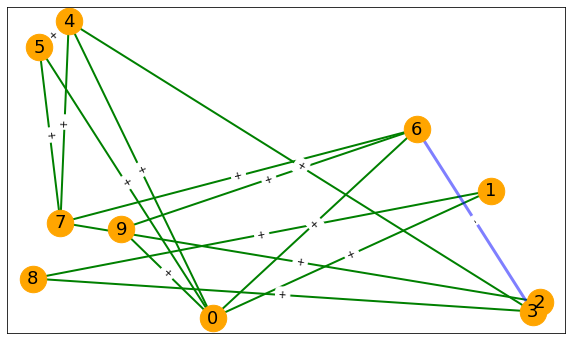

check_balance result for the graph from part B (1):  True


In [351]:
G_1 = generate_random_network(10, 0.4, 0.05, 0.95, '-', '+')
print("check_balance result for the graph from part B (1): ", check_balance(G_1))


##### B (2)
p(+) = 0.05, p(-) = 0.95

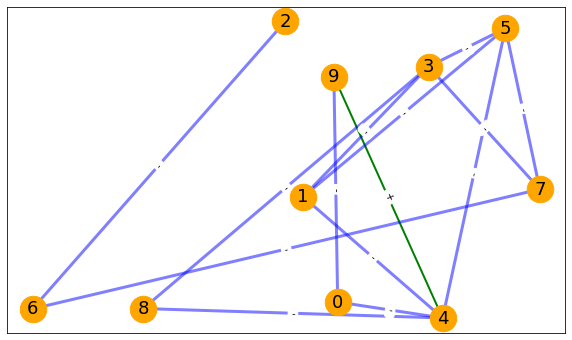

check_balance result for the graph from part B (2):  False


In [352]:
G_2 = generate_random_network(10, 0.4, 0.05, 0.95, '+', '-')
print("check_balance result for the graph from part B (2): ", check_balance(G_2))

#### Part D - in the PDF file

#### Part E - in the PDF file

### Question 4 - in the PDF file